# Time Series Data Analysis

## Introduction
This Jupyter Notebook explores time series data analysis using Python.

### Glossary

- **Import Packages**: Importing necessary Python packages for data analysis and visualization.

- **Loading Data**: Loading the time series dataset into the notebook for analysis.

- **Data Cleaning**: Process of cleaning the dataset by handling missing values, duplicates, and correcting data types.

- **Data Visualization**: Visual representation of the time series data through various plots and charts.

- **Normalization**: Preprocessing step to scale numerical features to a standard range.

- **KMeans Analysis**: Unsupervised machine learning algorithm used to identify clusters within the dataset.

## Contents
1. [Import Packages](#import-packages)
2. [Load Data](#load-data)
3. [Data Cleaning](#data-cleaning)
4. [Data Visualization](#data-visualization)
5. [Normalization](#normalization)
6. [KMeans Analysis](#kmeans-analysis)




### Import Packeges
<a id="import-packages"></a>

In [1]:
# data exploring
import pandas as pd
import numpy as np
from datetime import datetime

# visulization
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
#!pip install missingno
import missingno as msno

#visulize clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# null values prediction
from sklearn.ensemble import RandomForestRegressor



### Load Data
<a id="load-data"></a>

In [2]:
df = pd.read_csv('Behzad_01_training.csv')

In [3]:
df.head()

1900  5.75x  53.25x  2.4x  2.5x 2.4x.1  7.0x  10.9x  16.2x  18.4x  16.6x  \
0  1900  5.75x  52.75x  2.6x  1.1x   2.4x  7.5x  11.7x  16.7x  18.9x  17.0x   
1  1900  5.75x  52.25x  3.2x  1.8x   3.1x  7.7x  11.8x  16.6x  19.0x  16.9x   
2  1900  5.75x  51.75x  3.5x  3.0x   3.3x  7.9x  12.1x  16.5x  19.2x  16.7x   
3  1900  5.75x  51.25x  4.4x  4.0x   4.0x  8.9x  12.6x  17.2x  19.8x  16.8x   
4  1900  5.75x  50.75x  4.4x  3.7x   3.7x  8.2x  12.5x  16.7x  19.6x  16.5x   

   14.5x     NA  6.0x  5.1x  
0  15.1x  10.8x  6.6x  6.1x  
1  14.8x  10.7x  6.4x  5.9x  
2  14.5x  10.3x  5.9x  5.6x  
3  15.0x  10.7x  7.2x  6.2x  
4  14.9x  10.3x  6.3x  5.5x

In [4]:
# set column and index for the data 
df.columns = range(0, 15)

In [5]:
df.index

RangeIndex(start=0, stop=31977, step=1)

In [6]:
df.columns

RangeIndex(start=0, stop=15, step=1)

In [7]:
df.head(1)

0      1       2     3     4     5     6      7      8      9      10  \
0  1900  5.75x  52.75x  2.6x  1.1x  2.4x  7.5x  11.7x  16.7x  18.9x  17.0x   

      11     12    13    14  
0  15.1x  10.8x  6.6x  6.1x

### Data cleaning 
<a id="data-cleaning"></a>

- checking the type of featurs
- deleting unnecessary values
- convert the 'year' column into Datatime

In [8]:
# check the type of datas
df.dtypes

0      int64
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
dtype: object

In [9]:
#deleting 'x' 
df = df.replace('x', '', regex=True)

In [10]:
df.head(1)

0     1      2    3    4    5    6     7     8     9     10    11    12  \
0  1900  5.75  52.75  2.6  1.1  2.4  7.5  11.7  16.7  18.9  17.0  15.1  10.8   

    13   14  
0  6.6  6.1

In [11]:
# convert the types into float
for col in df.columns[1:]:
    df[col] = df[col].astype(float)

In [12]:
#convert the 'year' column into Datatime
df[0] = pd.to_datetime(df[0], format='%Y')

In [13]:
# Rename column names to use the features of string column
df.rename(columns={0:'Date', 1: 'One', 2:'Two', 3: 'Three', 4:'Four',
                   5:'Five', 6:'Six', 7:'Seven', 8:'Eight',
                   9:'Nine',10:'Ten', 11:'Eleven', 12:'Twelve',
                   13:'Thirteen', 14:'Fourteen', 15:'Fifteen'}, inplace=True)

In [14]:
df

Date    One    Two  Three  Four  Five  Six  Seven  Eight  Nine  \
0     1900-01-01   5.75  52.75    2.6   1.1   2.4  7.5   11.7   16.7  18.9   
1     1900-01-01   5.75  52.25    3.2   1.8   3.1  7.7   11.8   16.6  19.0   
2     1900-01-01   5.75  51.75    3.5   3.0   3.3  7.9   12.1   16.5  19.2   
3     1900-01-01   5.75  51.25    4.4   4.0   4.0  8.9   12.6   17.2  19.8   
4     1900-01-01   5.75  50.75    4.4   3.7   3.7  8.2   12.5   16.7  19.6   
...          ...    ...    ...    ...   ...   ...  ...    ...    ...   ...   
31972 2017-01-01  14.75  49.25   -6.0   1.0   5.9  6.3   13.7   18.3  18.6   
31973 2017-01-01  14.75  48.75   -5.9   1.3   6.2  6.8   13.6   18.6  18.8   
31974 2017-01-01  14.75  48.25   -4.5   2.0   7.2  7.9   14.9   19.6  19.4   
31975 2017-01-01  14.75  47.75   -7.5  -0.2   4.6  5.2   11.8   16.5  16.3   
31976 2017-01-01  14.75  47.25   -7.6   1.0   5.2  6.3   12.7   17.1  17.3   

        Ten  Eleven  Twelve  Thirteen  Fourteen  
0      17.0    15.1    10.8       6.6       6.1  
1      16.9    14.8    10.7       6.4       5.9  
2      16.7    14.5    10.3       5.9       5.6  
3      16.8    15.0    10.7       7.2       6.2  
4      16.5    14.9    10.3       6.3       5.5  
...     ...     ...     ...       ...       ...  
31972  18.4    11.7     9.6       3.3       0.4  
31973  19.1    11.7     9.7       3.4      -0.3  
31974  19.6    12.9    10.5       3.9       0.9  
31975  16.6     9.6     7.6       1.3      -1.9  
31976  17.0    10.5     7.0       0.9      -2.4  

[31977 rows x 15 columns]

### Data Visualization
<a id="data-Visualization"></a>

                                Date           One           Two  \
count                          31977  31977.000000  31977.000000   
mean   1958-07-03 04:14:23.270475584     10.333169     50.589400   
min              1900-01-01 00:00:00      5.750000     47.250000   
25%              1929-01-01 00:00:00      8.250000     48.750000   
50%              1959-01-01 00:00:00     10.250000     50.750000   
75%              1988-01-01 00:00:00     12.750000     52.250000   
max              2017-01-01 00:00:00     14.750000     54.750000   
std                              NaN      2.678206      2.095314   

              Three          Four          Five           Six        Seven  \
count  31021.000000  30991.000000  30944.000000  31016.000000  30958.00000   
mean      -0.302895      0.564874      3.894920      7.778302     12.42014   
min      -15.900000    -16.100000     -9.200000     -3.800000     -0.30000   
25%       -2.300000     -1.200000      2.400000      6.600000     11.30000 

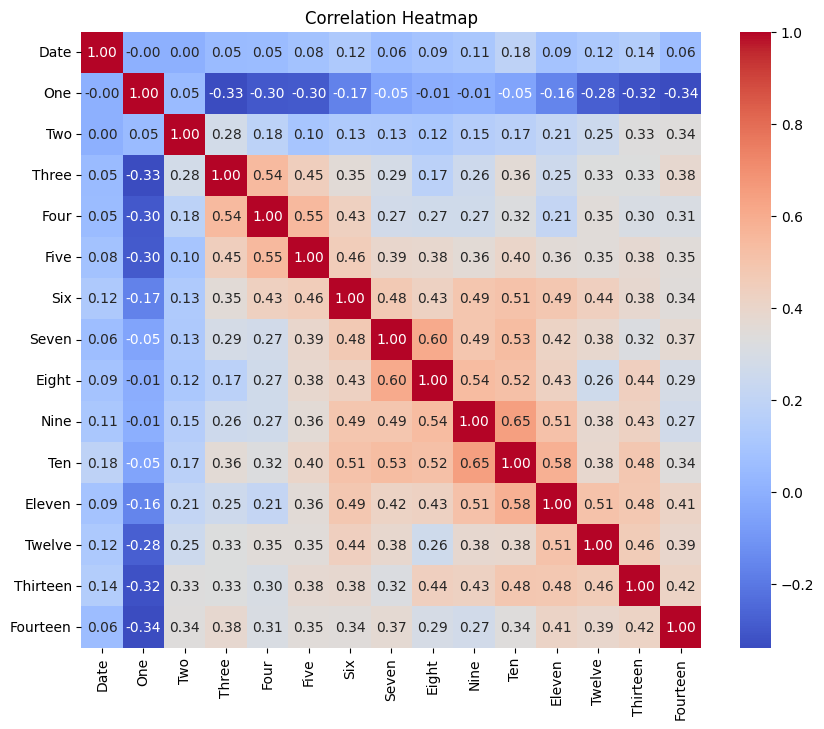

In [15]:
# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


> #### from the correlation heatmep, we can observe correlations in featurse except feature 'One' and 'Two'
> we can find some causality for this, so we need more visualization:

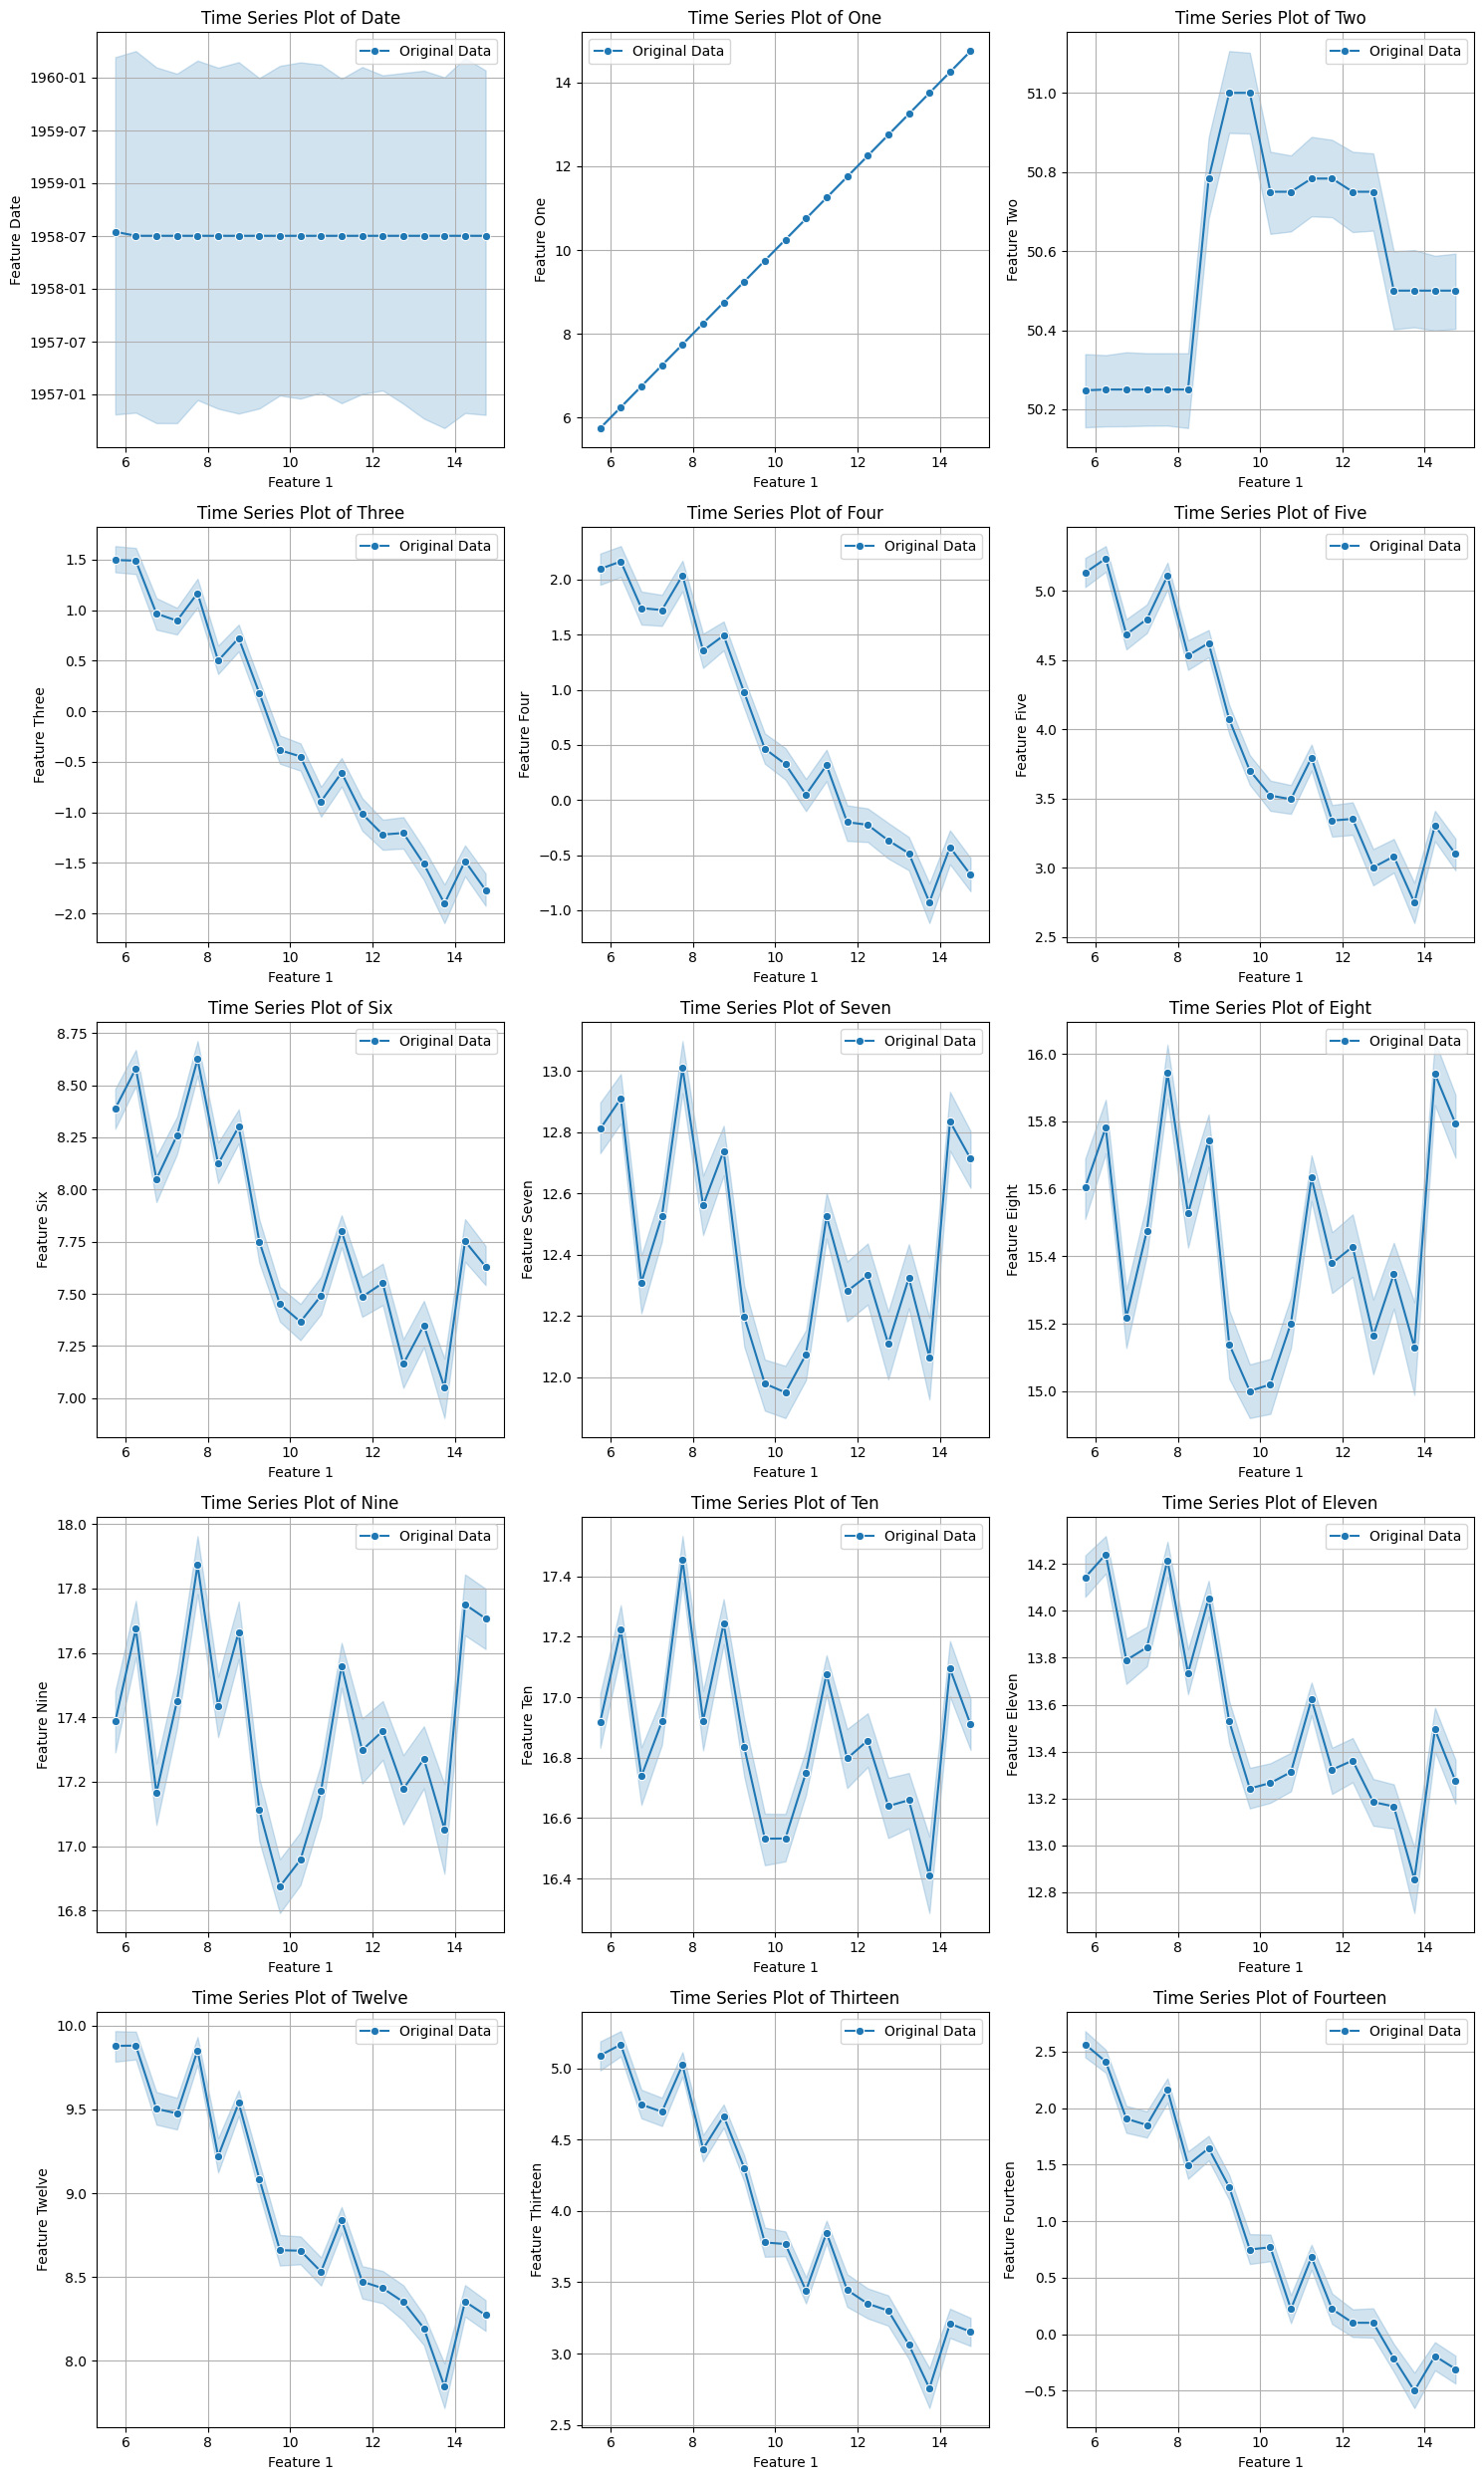

In [16]:
# Determine the number of rows and columns for subplots
num_cols = 3  # Number of line plots per row
num_features = len(df.columns)
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(df.columns):
    row = i // num_cols
    col = i % num_cols
    sns.lineplot(data=df, x=df['One'], y=df[column], ax=axes[row, col], label='Original Data', marker='o')
    axes[row, col].set_title(f'Time Series Plot of {column}')
    axes[row, col].set_xlabel('Feature 1')
    axes[row, col].set_ylabel(f'Feature {column}')
    axes[row, col].grid(True)

for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

As we have observed in the line plots, there are noticeable patterns or trends in the relationship between each feature and feature number one, suggesting a degree of correlation or similarity in their behavior over time. However, features 1 and 2 display distinct patterns compared to the other features.

Apart from features 0, 1 and 2, similar patterns are observed for 4 groups of features:

1. Features 3, 4, and 5
2. Features 6, 7, and 8
3. Features 9, 10, and 11
4. Features 12, 13, and 14

To further explore these relationships, we can utilize K-means clustering on our dataset.

# Normalization
<a id="normalization"></a>

# Preprocessing: Feature Normalization

Before proceeding with the application of KMeans clustering algorithm on our dataset, we will perform a preprocessing step by dividing all features by the value of the feature "One." This normalization technique aims to bring all features to a comparable scale, facilitating the interpretation of the data and potentially revealing insightful patterns.



- Normalization is a crucial preprocessing step in data analysis, especially when dealing with datasets containing features with varying scales. By dividing each feature by a reference feature, in this case, "One," we standardize the data and ensure that the impact of each feature is comparable.

## Methodology

1. **Data Preparation**: Load the dataset and identify the relevant features for normalization.

2. **Feature Division**: Divide each feature by the value of the feature "One" to normalize the data.

3. **Line Plot Visualization**: Plot the normalized features on a line plot to visualize their behavior collectively. This visualization will allow us to observe any trends or patterns in the data before applying KMeans clustering.

## Expected Outcome

The line plot of the normalized features will provide insights into the overall behavior of the dataset. By observing the collective trends, we may uncover interesting relationships or correlations among the features. These insights will guide our subsequent analysis and interpretation of the data using KMeans clustering.

In [17]:
# Select the columns from "Three" to "Fourteen"
selected_features = df.columns[3:]

# Create a new DataFrame to store the transformed data
transformed_df = pd.DataFrame()

# Divide each selected feature by the values in the "One" column
for feature in selected_features:
    transformed_df[feature] = df[feature] / df['One']


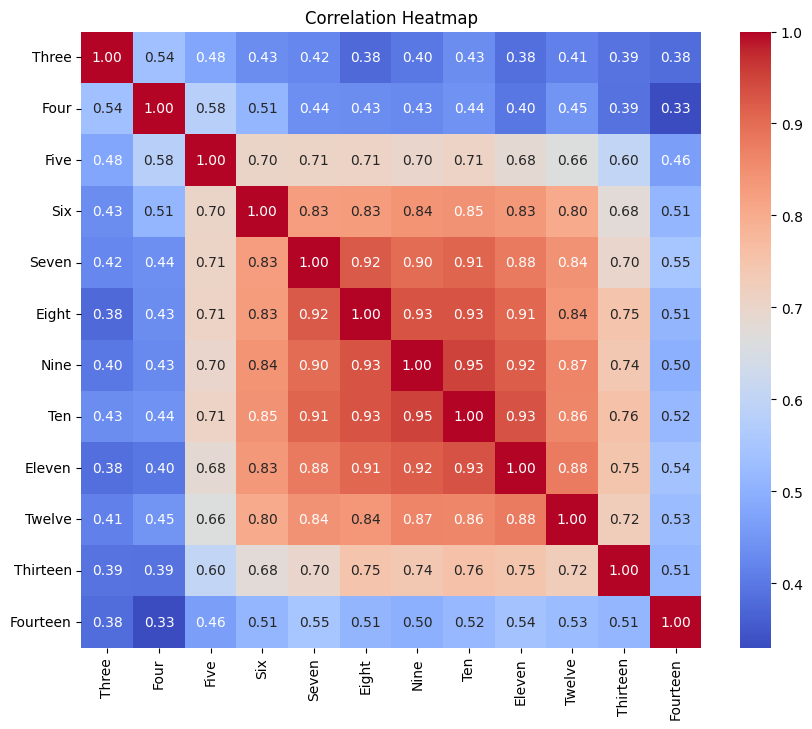

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transformed_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


<Axes: >

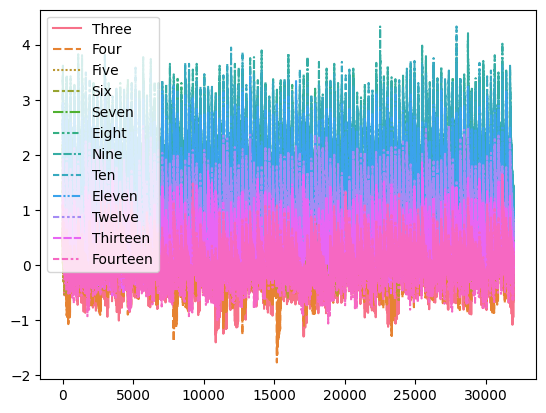

In [19]:
sns.lineplot(data=transformed_df)

/Users/behzadnekoogol/miniconda3/envs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


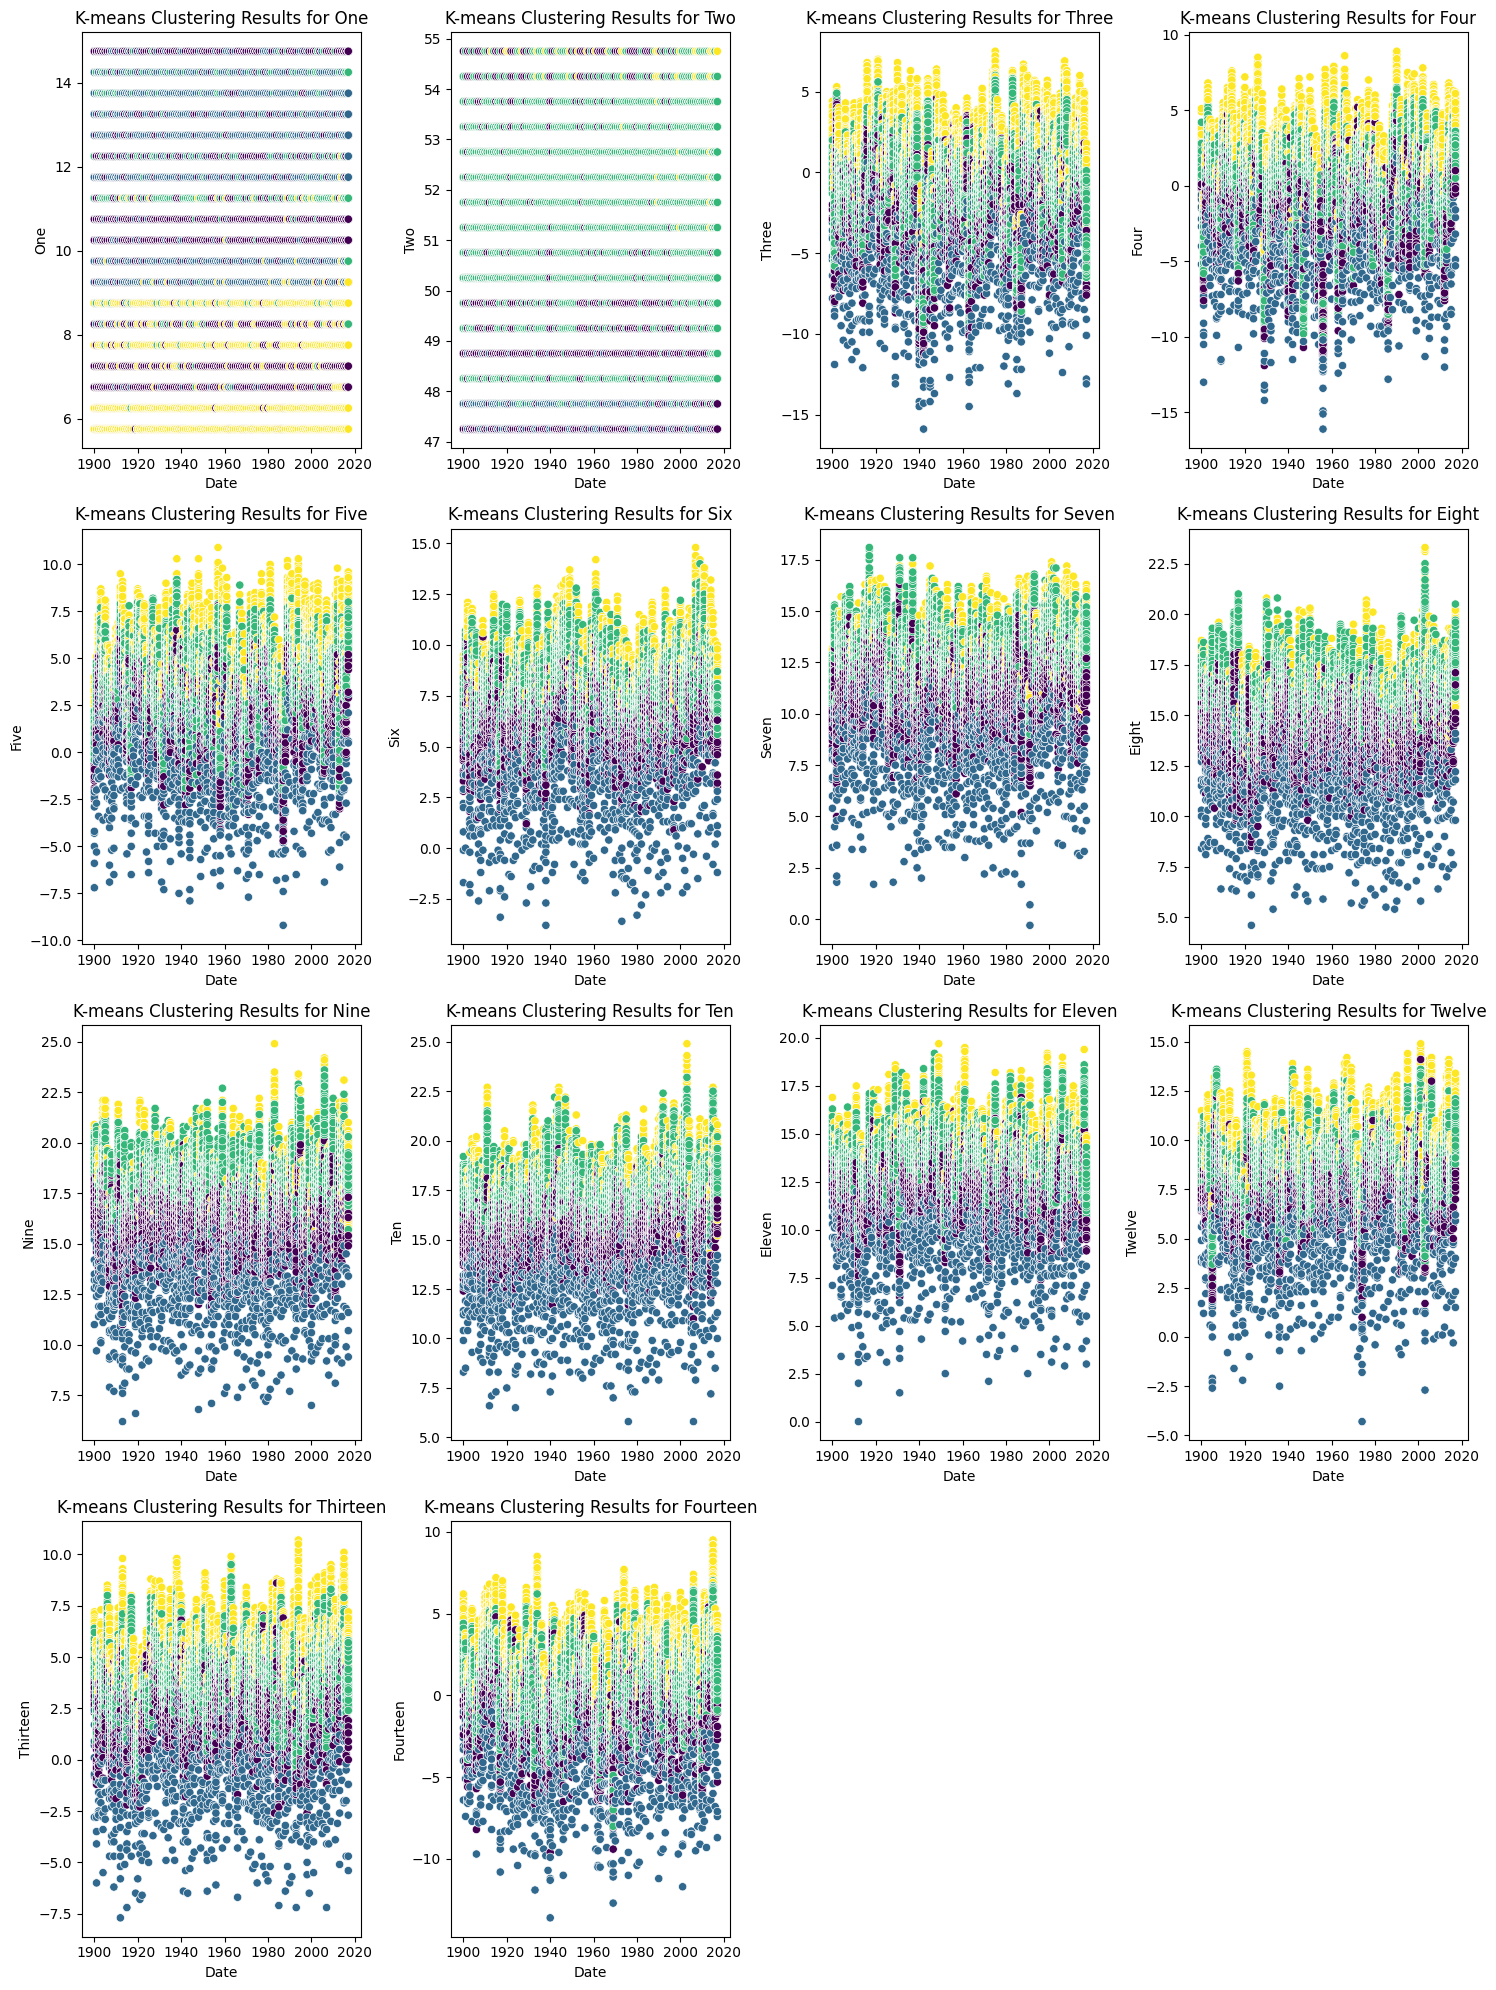

In [20]:
# Drop rows with missing values
df.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])  # Exclude the 'Date' column

# Apply K-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters for all features
num_features = len(df.columns) - 2  # Exclude 'Date' and 'Cluster' columns
num_cols = 4  # Number of subplots per row
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(df.columns[1:-1]):  # Exclude 'Date' and 'Cluster' columns
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(data=df, x='Date', y=column, hue='Cluster', palette='viridis',color='r', ax=axes[row, col])
    axes[row, col].set_xlabel('Date')
    axes[row, col].set_ylabel(column)
    axes[row, col].set_title(f'K-means Clustering Results for {column}')
    axes[row, col].legend().remove()

for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

/Users/behzadnekoogol/miniconda3/envs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


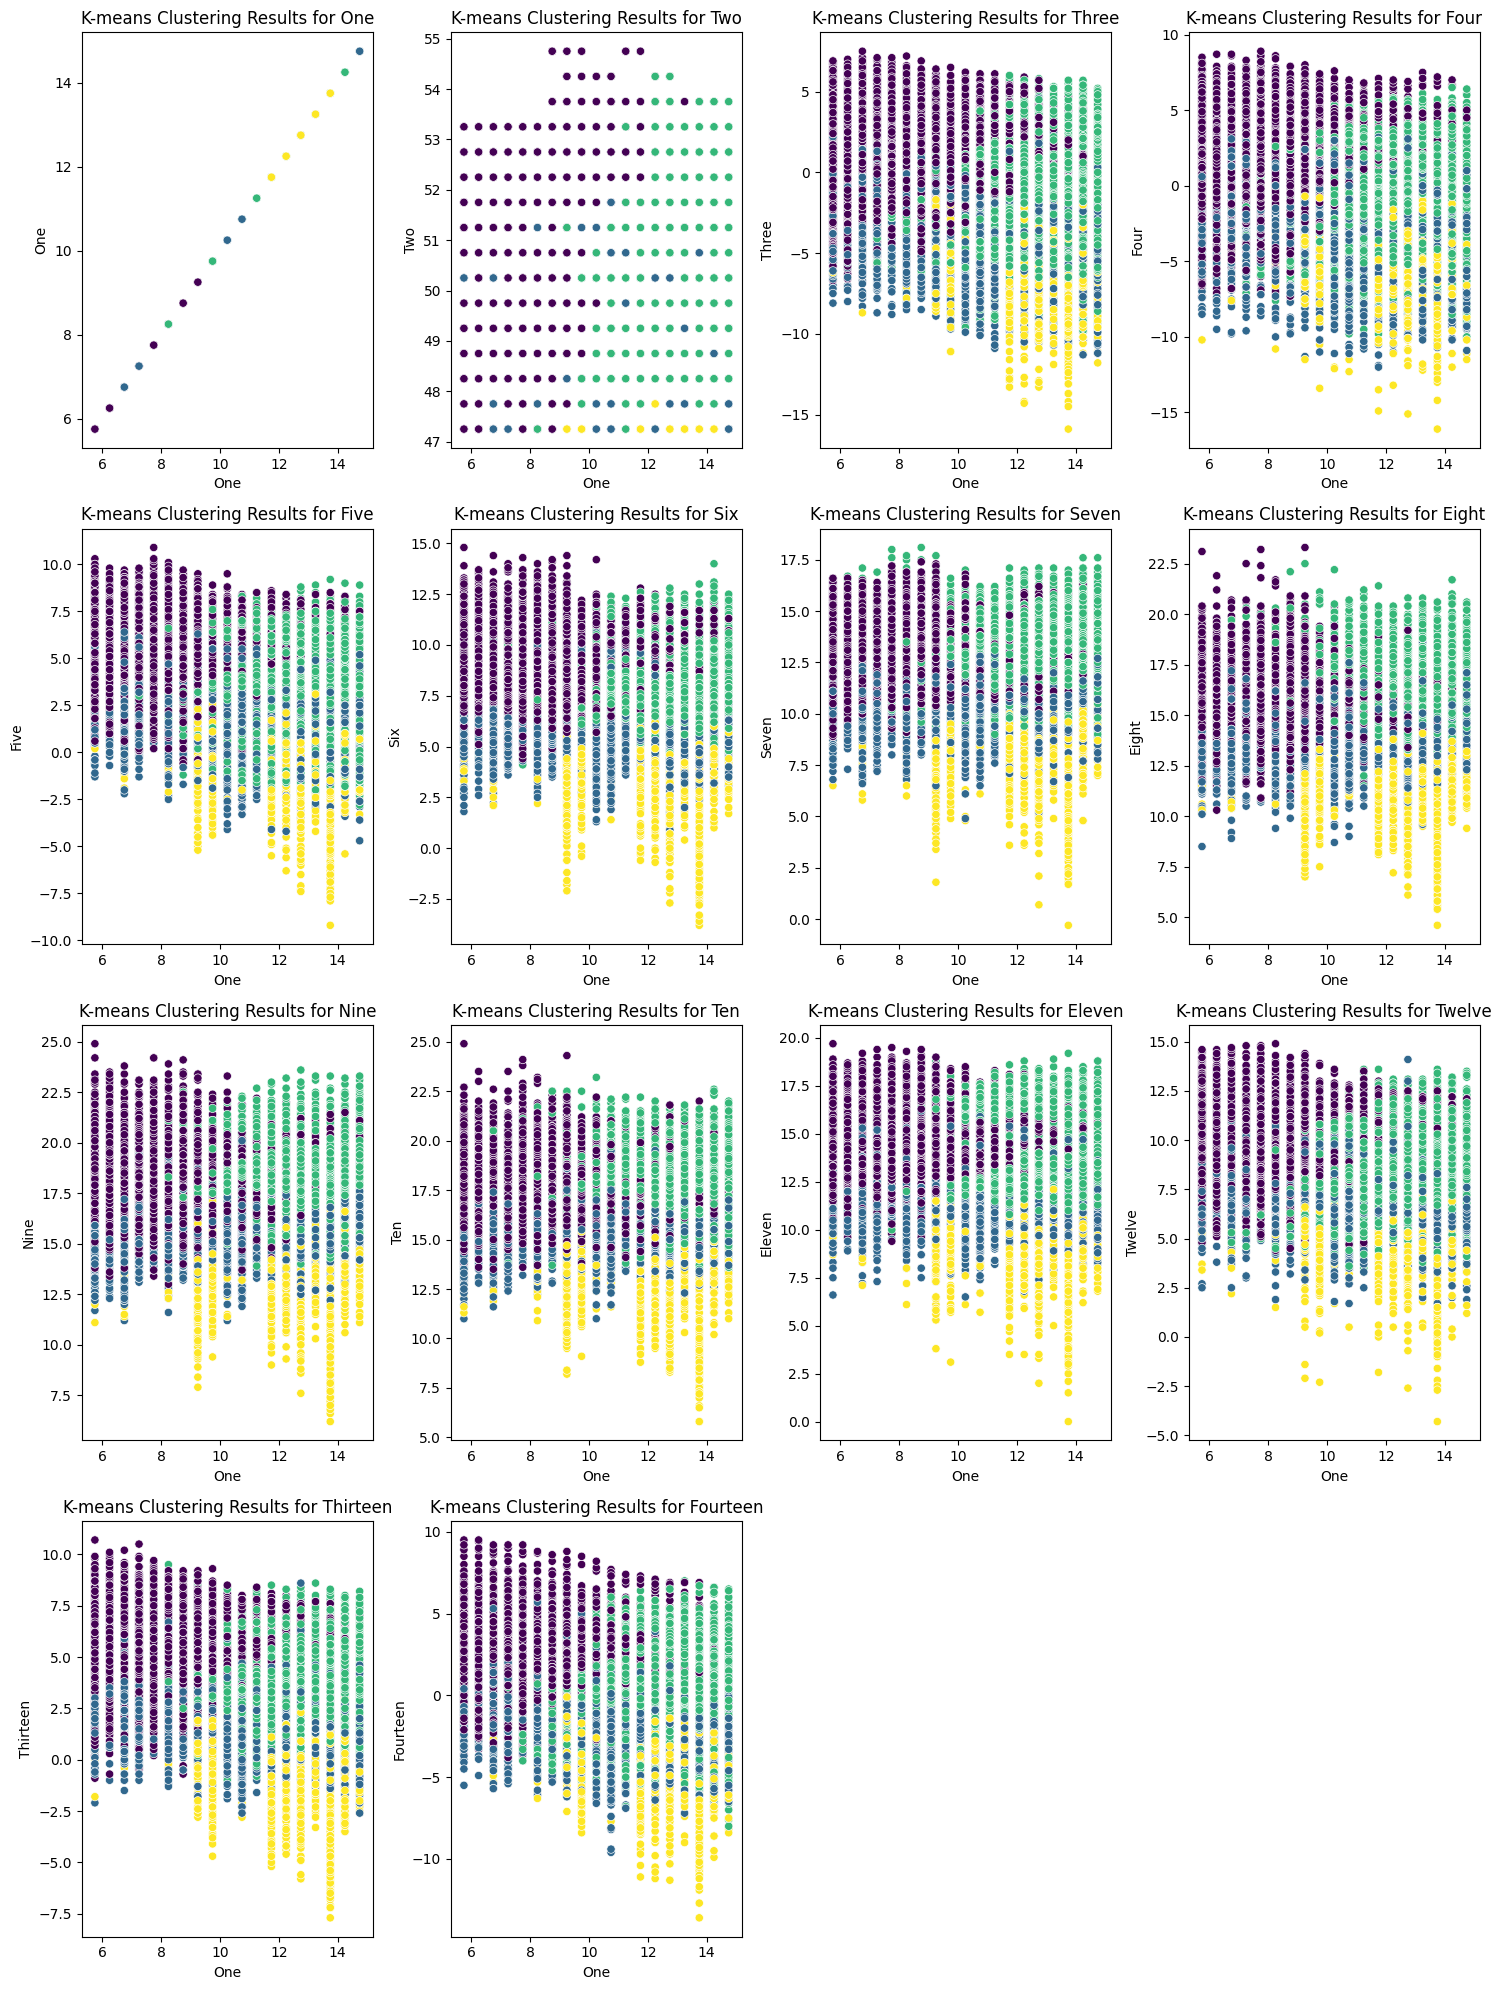

In [21]:
# Drop rows with missing values
df.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.iloc[:, 1:])  # Exclude the 'Date' column

# Apply K-means clustering
k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters for all features
num_features = len(df.columns) - 2  # Exclude 'Date' and 'Cluster' columns
num_cols = 4  # Number of subplots per row
num_rows = math.ceil(num_features / num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(df.columns[1:-1]):  # Exclude 'Date' and 'Cluster' columns
    row = i // num_cols
    col = i % num_cols
    sns.scatterplot(data=df, x='One', y=column, hue='Cluster', palette='viridis', ax=axes[row, col])
    axes[row, col].set_xlabel('One')
    axes[row, col].set_ylabel(column)
    axes[row, col].set_title(f'K-means Clustering Results for {column}')
    axes[row, col].legend().remove()

for i in range(num_features, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

/Users/behzadnekoogol/miniconda3/envs/ML/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


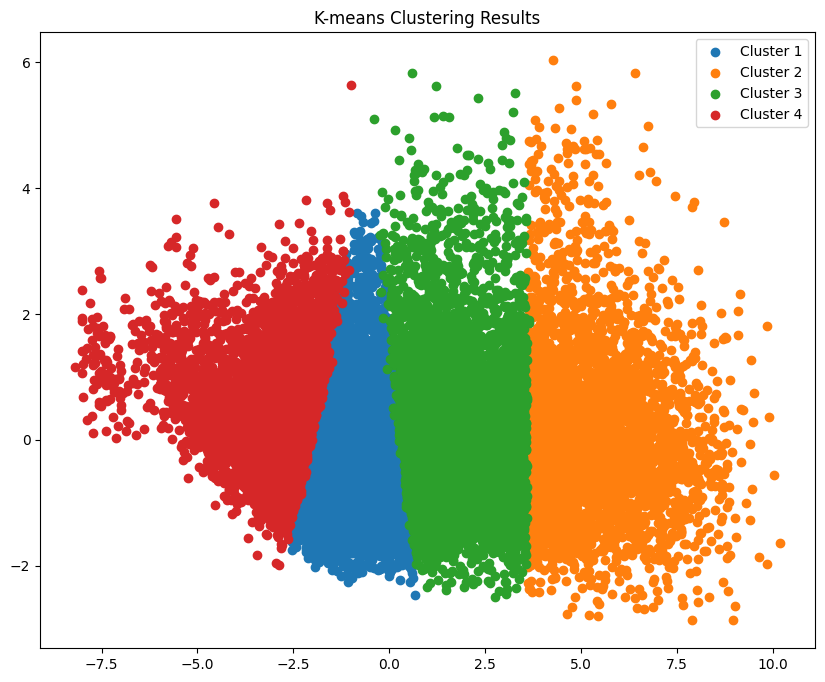

In [28]:
transformed_df.dropna(inplace=True)

# Standardize the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(transformed_df)

# Choose the number of clusters (K), we observe 4 groups
k = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_data)

# Visualize the Clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 8))
for i in range(k):
    plt.scatter(pca_result[kmeans.labels_ == i, 0], pca_result[kmeans.labels_ == i, 1], label=f'Cluster {i+1}')

plt.title('K-means Clustering Results')
plt.legend()
plt.show()


In [ ]:
df

# KMeans Analysis
<a id="kmeans-analysis"></a>

# K-Means Clustering Analysis

After applying K-Means clustering to the dataset, we have identified four distinct clusters. Each cluster represents a group of features exhibiting similar patterns over time. 

## Observations:

- **Four Clusters:** The clustering analysis revealed the presence of four distinct groups, each containing three features with similar patterns. 
- **Correlation Analysis:** The correlation heatmap indicates a strong correlation among the features within each cluster, suggesting a cohesive relationship.
- **Seasonal Representation:** These clusters may correspond to seasons of the year, with each group representing a different season: spring, summer, autumn, and winter.

## Conclusion:

The identification of these clusters provides valuable insights into the underlying patterns and relationships within the dataset. Understanding these patterns can aid in further analysis and decision-making processes.
